In [1]:
%matplotlib inline
import cv2
from tqdm import tqdm
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab
import numpy as np
import quat_math as qm
from generic_pose.utils import to_np, to_var

import warnings; warnings.simplefilter('ignore')
pylab.rcParams['figure.figsize'] = 20, 12

In [2]:
data = np.load('certainty_results.npz')
data_index = np.asscalar(data['data_index'])
certainty = np.asscalar(data['certainty'])
error_rot = np.asscalar(data['error_rot'])
error_trans = np.asscalar(data['error_trans'])
error_rot_ref = np.asscalar(data['error_rot_ref'] )
error_trans_ref = np.asscalar(data['error_trans_ref'])

with open('datasets/ycb/YCB_Video_Dataset/image_sets/classes.txt') as f:
    classes = f.read().split()
classes.insert(0, 'background')

In [3]:
from sklearn import metrics

def certaintyAOC(error, certainty, max_theshold):
    if(type(error) is not np.ndarray):
        error = np.array(error)
        
    precision = []
    recall = []
    pr_auc = []
    thesholds = np.linspace(0,max_theshold, 100)
    for th in thesholds:
        p, r, _ = metrics.precision_recall_curve(error < th, certainty)
        precision.append(p)
        recall.append(r)
        pr_auc.append(metrics.auc(r, p))    
        
    return precision, recall, pr_auc, thesholds
    

In [4]:
data.keys()


['data_index',
 'certainty',
 'trans_gt',
 'quats_gt',
 'trans_est',
 'quats_est',
 'trans_ref',
 'quats_ref',
 'trans_all',
 'quats_all',
 'error_add',
 'error_add_ref',
 'error_rot',
 'error_trans',
 'error_rot_ref',
 'error_trans_ref',
 'error_rot_all',
 'error_trans_all']

[57.852945363362046]


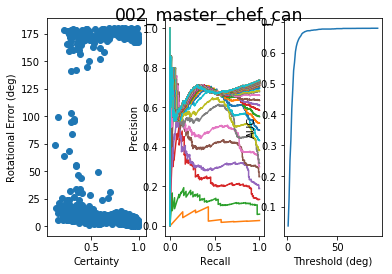

[57.852945363362046, 83.45648334944352]


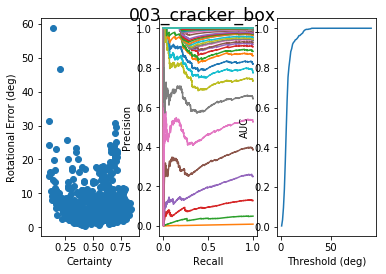

[57.852945363362046, 83.45648334944352, 85.65823084140251]


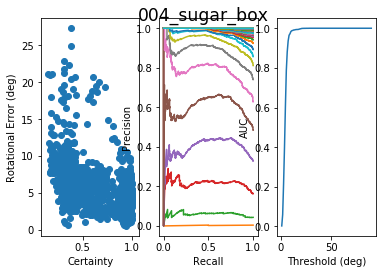

[57.852945363362046, 83.45648334944352, 85.65823084140251, 81.6115041785057]


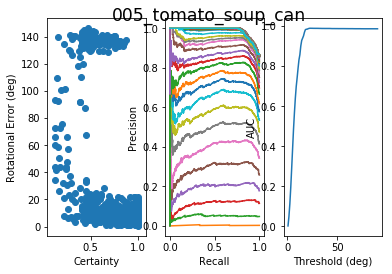

[57.852945363362046, 83.45648334944352, 85.65823084140251, 81.6115041785057, 85.59058778895407]


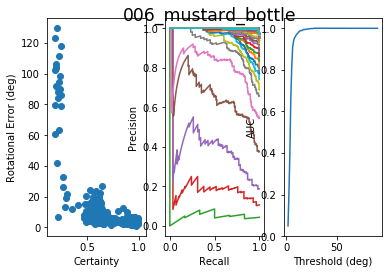

[57.852945363362046, 83.45648334944352, 85.65823084140251, 81.6115041785057, 85.59058778895407, 70.3844659277928]


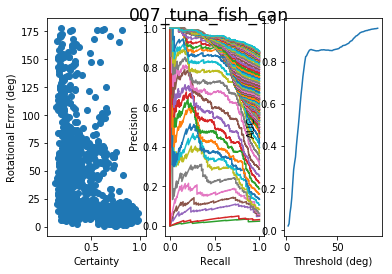

[57.852945363362046, 83.45648334944352, 85.65823084140251, 81.6115041785057, 85.59058778895407, 70.3844659277928, 81.27295729576173]


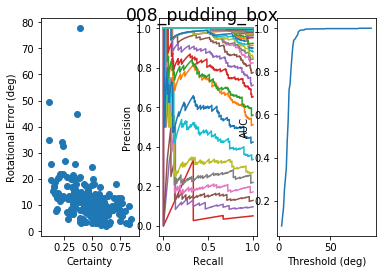

[57.852945363362046, 83.45648334944352, 85.65823084140251, 81.6115041785057, 85.59058778895407, 70.3844659277928, 81.27295729576173, 85.91310092583362]


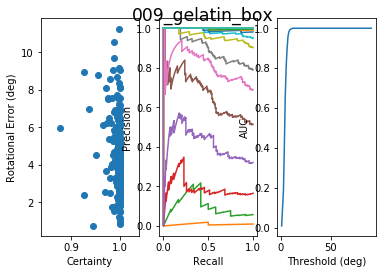

[57.852945363362046, 83.45648334944352, 85.65823084140251, 81.6115041785057, 85.59058778895407, 70.3844659277928, 81.27295729576173, 85.91310092583362, 84.11510966834895]


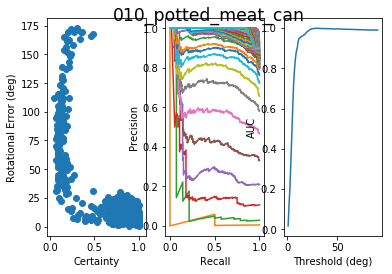

[57.852945363362046, 83.45648334944352, 85.65823084140251, 81.6115041785057, 85.59058778895407, 70.3844659277928, 81.27295729576173, 85.91310092583362, 84.11510966834895, 82.38168099714342]


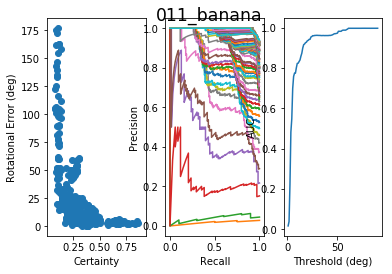

[57.852945363362046, 83.45648334944352, 85.65823084140251, 81.6115041785057, 85.59058778895407, 70.3844659277928, 81.27295729576173, 85.91310092583362, 84.11510966834895, 82.38168099714342, 83.91111898391253]


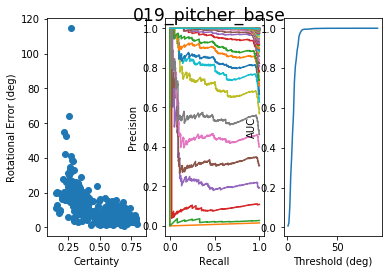

[57.852945363362046, 83.45648334944352, 85.65823084140251, 81.6115041785057, 85.59058778895407, 70.3844659277928, 81.27295729576173, 85.91310092583362, 84.11510966834895, 82.38168099714342, 83.91111898391253, 84.53027276148894]


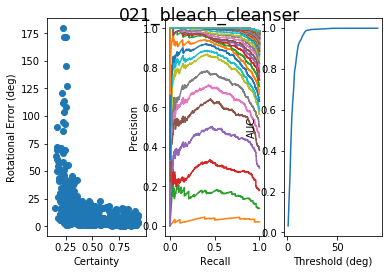

[57.852945363362046, 83.45648334944352, 85.65823084140251, 81.6115041785057, 85.59058778895407, 70.3844659277928, 81.27295729576173, 85.91310092583362, 84.11510966834895, 82.38168099714342, 83.91111898391253, 84.53027276148894, 0]


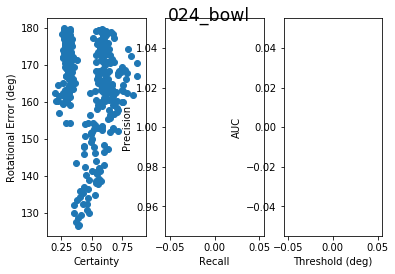

[57.852945363362046, 83.45648334944352, 85.65823084140251, 81.6115041785057, 85.59058778895407, 70.3844659277928, 81.27295729576173, 85.91310092583362, 84.11510966834895, 82.38168099714342, 83.91111898391253, 84.53027276148894, 0, 81.63300591748089]


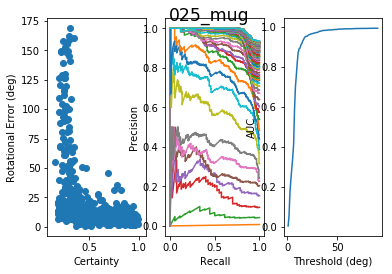

[57.852945363362046, 83.45648334944352, 85.65823084140251, 81.6115041785057, 85.59058778895407, 70.3844659277928, 81.27295729576173, 85.91310092583362, 84.11510966834895, 82.38168099714342, 83.91111898391253, 84.53027276148894, 0, 81.63300591748089, 81.4470001783878]


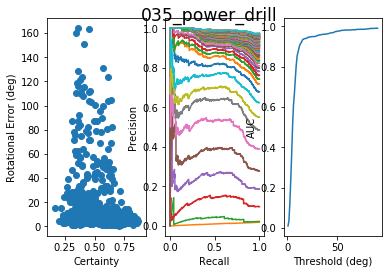

[57.852945363362046, 83.45648334944352, 85.65823084140251, 81.6115041785057, 85.59058778895407, 70.3844659277928, 81.27295729576173, 85.91310092583362, 84.11510966834895, 82.38168099714342, 83.91111898391253, 84.53027276148894, 0, 81.63300591748089, 81.4470001783878, 3.0182348479456307]


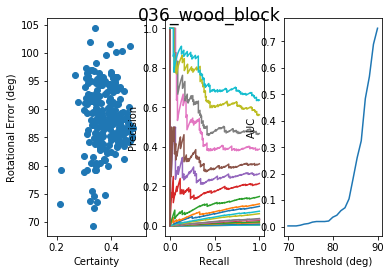

[57.852945363362046, 83.45648334944352, 85.65823084140251, 81.6115041785057, 85.59058778895407, 70.3844659277928, 81.27295729576173, 85.91310092583362, 84.11510966834895, 82.38168099714342, 83.91111898391253, 84.53027276148894, 0, 81.63300591748089, 81.4470001783878, 3.0182348479456307, 54.83478752236409]


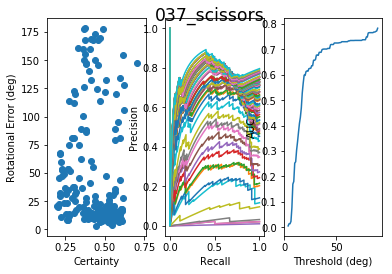

[57.852945363362046, 83.45648334944352, 85.65823084140251, 81.6115041785057, 85.59058778895407, 70.3844659277928, 81.27295729576173, 85.91310092583362, 84.11510966834895, 82.38168099714342, 83.91111898391253, 84.53027276148894, 0, 81.63300591748089, 81.4470001783878, 3.0182348479456307, 54.83478752236409, 62.34544621064899]


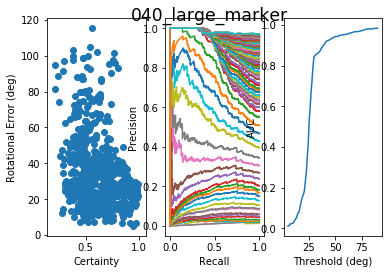

[57.852945363362046, 83.45648334944352, 85.65823084140251, 81.6115041785057, 85.59058778895407, 70.3844659277928, 81.27295729576173, 85.91310092583362, 84.11510966834895, 82.38168099714342, 83.91111898391253, 84.53027276148894, 0, 81.63300591748089, 81.4470001783878, 3.0182348479456307, 54.83478752236409, 62.34544621064899, 0]


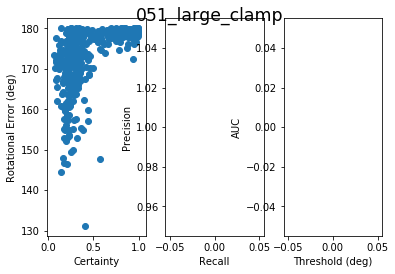

[57.852945363362046, 83.45648334944352, 85.65823084140251, 81.6115041785057, 85.59058778895407, 70.3844659277928, 81.27295729576173, 85.91310092583362, 84.11510966834895, 82.38168099714342, 83.91111898391253, 84.53027276148894, 0, 81.63300591748089, 81.4470001783878, 3.0182348479456307, 54.83478752236409, 62.34544621064899, 0, 47.018884512099014]


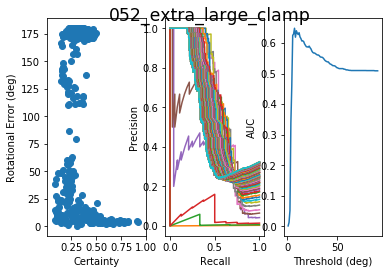

[57.852945363362046, 83.45648334944352, 85.65823084140251, 81.6115041785057, 85.59058778895407, 70.3844659277928, 81.27295729576173, 85.91310092583362, 84.11510966834895, 82.38168099714342, 83.91111898391253, 84.53027276148894, 0, 81.63300591748089, 81.4470001783878, 3.0182348479456307, 54.83478752236409, 62.34544621064899, 0, 47.018884512099014, 10.962752525252524]


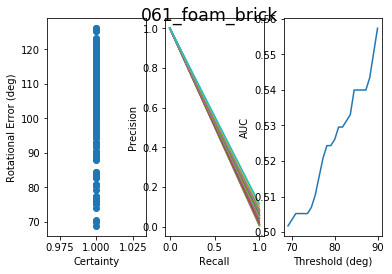

In [34]:
aus_score = []

for cls_idx in range(1,22):

    ax = plt.subplot(1,3,1)
    ax.scatter(certainty[cls_idx], error_rot[cls_idx])
    plt.xlabel('Certainty')
    plt.ylabel('Rotational Error (deg)')
    #plt.show()

    #p,r, mean_error = certaintyOrderAOC(error_rot[cls_idx], certainty[cls_idx], 5)
    #plt.plot(r,p)
    #plt.xlabel('Recall')
    #lt.ylabel('Precision')
    #plt.show()

    #plt.plot(mean_error)
    #plt.xlabel('Samples Removed')
    #plt.ylabel('Rotational Error (deg)')
    #plt.show()
    ax = plt.subplot(1,3,2)
    p,r, pr_auc, thresholds = certaintyAOC(error_rot[cls_idx], certainty[cls_idx], 90)
    for p_p, p_r in zip(p, r):
        ax.plot(p_r,p_p)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    #plt.show()

    nan_mask = np.isfinite(pr_auc)
    if(nan_mask.sum() > 2):
        aus_score.append(metrics.auc(np.array(thresholds)[np.isfinite(pr_auc)], 
                                     np.array(pr_auc)[np.isfinite(pr_auc)]))
    else:
        aus_score.append(0)
        
    ax = plt.subplot(1,3,3)
    plt.plot(thresholds, pr_auc)
    plt.xlabel('Threshold (deg)')
    plt.ylabel('AUC')
    plt.suptitle(classes[cls_idx], y = .92, fontsize='xx-large')
    plt.show()

In [32]:
metrics.auc([1,2],[1,2])

1.5

[57.852945363362046, 83.45648334944352, 85.65823084140251, 81.6115041785057, 85.59058778895407, 70.3844659277928, 81.27295729576173, 85.91310092583362, 84.11510966834895, 82.38168099714342, 83.91111898391253, 84.53027276148894, 0, 81.63300591748089, 81.4470001783878, 3.0182348479456307, 54.83478752236409, 62.34544621064899, 0, 47.018884512099014, 10.962752525252524]


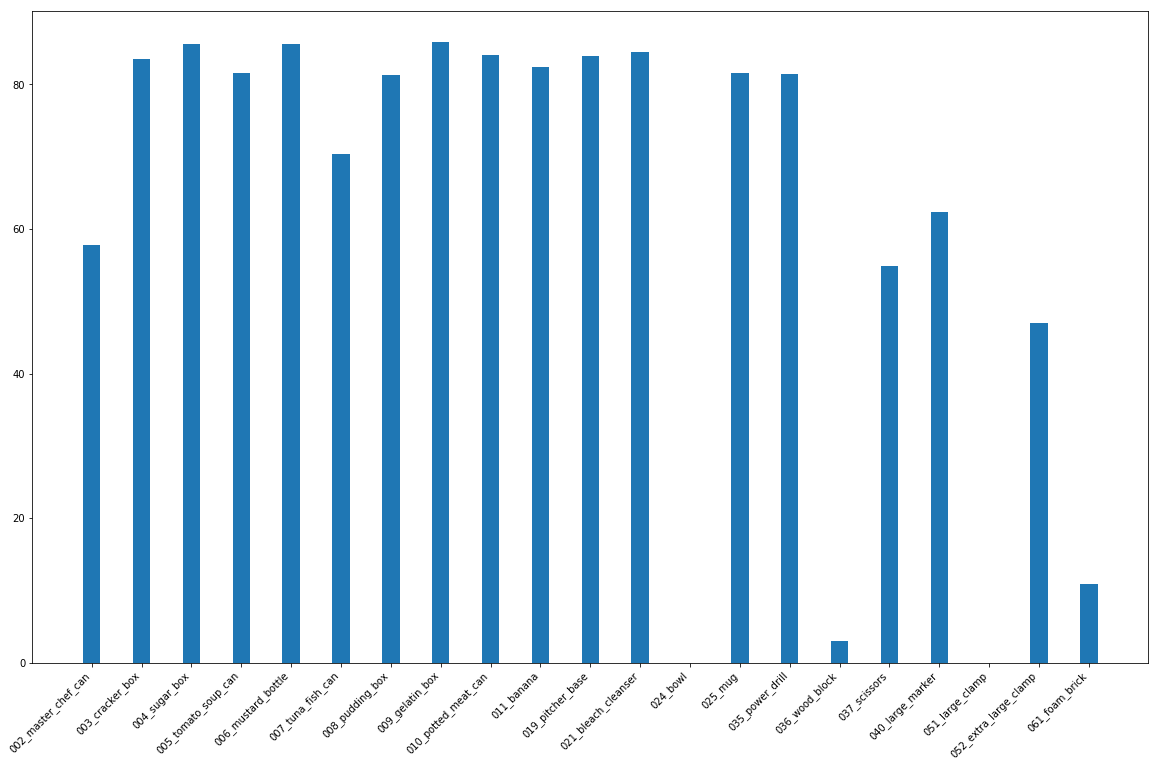

In [42]:
fig, ax = plt.subplots()
plt.bar(range(1,22), aus_score, width = 0.35)
ax.set_xticks(range(1,22))
ax.set_xticklabels(classes[1:], rotation=45, ha='right')
plt.show()